In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#　条件設定
u = np.matrix([[9], [1], [1]]) # 変更
sigma_u = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
vp = np.matrix([[9], [1], [2]])
sigma_p = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
theta = np.matrix([[1.0, 0.5, 0.2],[0.5, 0.5, 0.5],[0.1, 0.3, 0.9]]) # 変更

dt = 0.01

In [3]:
v = list(np.matrix([[0], [0], [0]]) for i in range(2000))
v[0] = vp
ep = list(np.matrix([[0], [0], [0]]) for i in range(2000))
eu = list(np.matrix([[0], [0], [0]]) for i in range(2000))

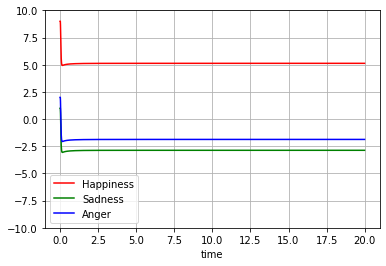

[[8.96128471]
 [0.96128471]
 [1.96128471]]
[[1.0699437 0.0749437 0.0749437]
 [0.0749437 1.0699437 0.0749437]
 [0.0749437 0.0749437 1.0699437]]
[[1.63003672 1.08582686 1.08582686]
 [1.08582686 2.851617   1.856617  ]
 [1.08582686 1.856617   2.851617  ]]
[[-1.96408164 -0.42926793 -0.19473689]
 [-4.5681785  -1.08892241 -0.17494667]
 [-4.9681785  -1.28892241  0.22505333]]


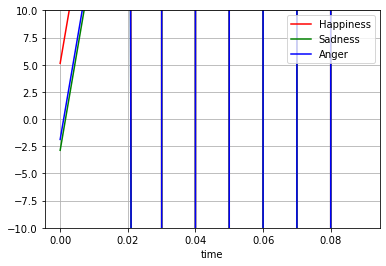

[[nan]
 [nan]
 [nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


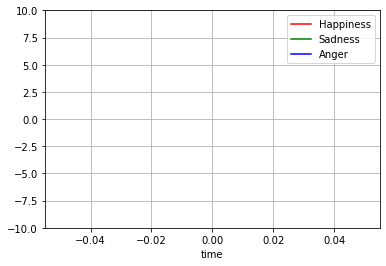

[[nan]
 [nan]
 [nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


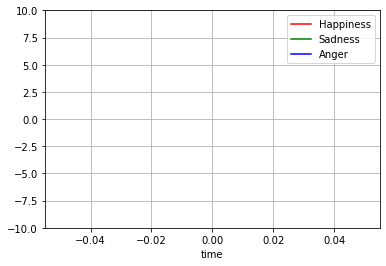

[[nan]
 [nan]
 [nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


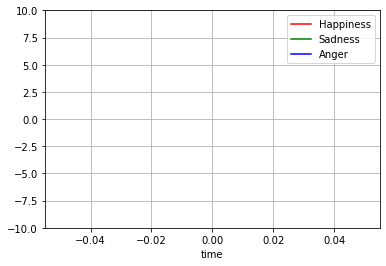

[[nan]
 [nan]
 [nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [4]:
for j in range(5):
    # 知覚
    for i in range(1, 2000):
        h = v[i-1].T * v[i-1]
        g = v[i-1].T * theta * v[i-1]
        dg = theta * 2 * v[i-1]

        v[i] = v[i-1] + dt * (dg.T*eu[i-1] - ep[i-1])
        ep[i] = ep[i-1] + dt * (v[i-1] - vp - sigma_p*ep[i-1])
        eu[i] = eu[i-1] + dt * (u - g - sigma_u*eu[i-1])

    Hap = list(v[i][0, 0] for i in range(2000))
    Sad = list(v[i][1, 0] for i in range(2000))
    Ang = list(v[i][2, 0] for i in range(2000))
    fig = plt.figure()
    plt.plot(np.arange(0,20,0.01), Hap, color='r', label='Happiness')
    plt.plot(np.arange(0,20,0.01), Sad, color='g', label='Sadness')
    plt.plot(np.arange(0,20,0.01), Ang, color='b', label='Anger')
    plt.ylim(-10, 10)
    plt.xlabel('time')
    plt.legend()
    plt.grid()
    plt.show()

    sp_rev = np.linalg.inv(sigma_p)
    su_rev = np.linalg.inv(sigma_u)

    h = np.multiply(v[-1], v[-1])

    # 学習
    # for i in range(5):
    vp = vp + dt * ep[-1]
    sigma_p = sigma_p + 1/2 * (ep[-1]*ep[-1].T - sp_rev) * dt
    sigma_u = sigma_u + 1/2 * (eu[-1]*eu[-1].T - su_rev) * dt
    theta = theta + eu[-1] * h.T * dt

    v[0] = v[-1]
    ep[0] = ep[-1]
    eu[0] = eu[-1]

    print(vp)
    print(sigma_p)
    print(sigma_u)
    print(theta)

In [5]:
Hap = list(v[i][0, 0] for i in range(2000))
Sad = list(v[i][1, 0] for i in range(2000))
Ang = list(v[i][2, 0] for i in range(2000))

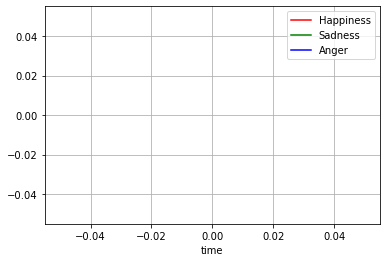

[[nan]
 [nan]
 [nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [6]:
fig = plt.figure()
plt.plot(np.arange(0,20,0.01), Hap, color='r', label='Happiness')
plt.plot(np.arange(0,20,0.01), Sad, color='g', label='Sadness')
plt.plot(np.arange(0,20,0.01), Ang, color='b', label='Anger')
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()

print(vp)
print(sigma_p)
print(sigma_u)
print(theta)